In [52]:
import networkx as nx
import numpy as np
import pandas as pd
import datacleaning
import itertools
from nltk.probability import FreqDist
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statsmodels
import powerlaw

In [53]:
data = pd.read_csv("data_small.csv", converters={"ingredient_words": literal_eval,"instruction_words": literal_eval})
data = data.rename(columns={"Unnamed: 0":"Id"})

In [87]:
instruction_centralities = pd.read_csv("instruction_centralities.csv")[['Label','Weighted Degree',"betweenesscentrality","pageranks"]].rename(columns = {"betweenesscentrality":"Betweenness Centrality", "pageranks":"PageRank Centrality"})
ingredient_centralities = pd.read_csv("ingredient_centralities.csv")[['Label','Weighted Degree',"betweenesscentrality","pageranks"]].rename(columns = {"betweenesscentrality":"Betweenness Centrality", "pageranks":"PageRank Centrality"})

In [55]:
instruction_centralities.sort_values(by="Betweenness Centrality", ascending=False).head()

,Label,Weighted Degree,Betweeness Centrality,PageRank Centrality
3474,Parmesan Basil Tomato Soup,33.310785,0.070661,0.002511
586,Pork Picadillo,21.035449,0.047740,0.001622
4850,Chili Casserole,12.449181,0.043518,0.001076
2933,Millet Mung Bean Main Dish,11.777770,0.037250,0.000894
4567,Honey Cornbread,11.952014,0.035274,0.000955


In [88]:
df = ingredient_centralities.sort_values(by="Betweenness Centrality", ascending=False).head()
df
print(df.to_latex(index=False,

                  formatters={"name": str.upper},

                  float_format="{:.4f}".format,

))  

\begin{tabular}{lrrr}
\toprule
Label & Weighted Degree & Betweenness Centrality & PageRank Centrality \\
\midrule
Easy Slow Cooker Chicken & 15.5401 & 0.0286 & 0.0014 \\
Cheese Sauce for Broccoli and Cauliflower & 8.2427 & 0.0280 & 0.0009 \\
Caramel Nut Cake in a Jar & 10.0109 & 0.0273 & 0.0008 \\
Spicy Chicken Breasts & 6.0290 & 0.0262 & 0.0006 \\
Grilled Chicken and Herbs & 9.2008 & 0.0258 & 0.0009 \\
\bottomrule
\end{tabular}



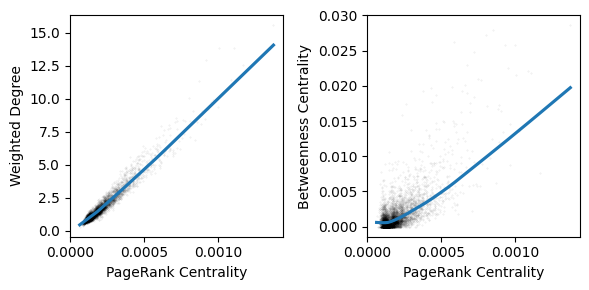

In [89]:
fig, axes = plt.subplots(1,2, figsize= (6,3))
b = sns.regplot(data=ingredient_centralities, x='PageRank Centrality', y='Weighted Degree', ax=axes[0], lowess=True, scatter_kws={'alpha':0.1, 's':.1, 'color':'black'})
a = sns.regplot(data=ingredient_centralities, x='PageRank Centrality', y='Betweenness Centrality', ax=axes[1],lowess=True, scatter_kws={'alpha':0.1, 's':.1, 'color':'black'})
# fig.set_xscale('log')
plt.tight_layout()
# a.set_yscale('log')
plt.savefig('figs/tfidf_instcentrality_betweenness_degree_pagerank.pdf')

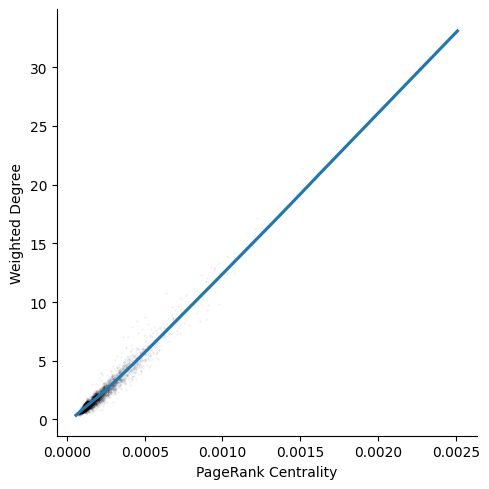

In [58]:
sns.lmplot(data=instruction_centralities, x='PageRank Centrality', y='Weighted Degree',lowess=True, scatter_kws={'alpha':0.1, 's':.1, 'color':'black'})

In [59]:
def count_degrees(degrees):
    # lens = [len(g) for g in coms]
    s, count = np.unique(degrees, return_counts=True)
    return s, count


# fig, axes = plt.subplots(1,2, figsize= (6,3), sharex=True, sharey=True)
# plot_components(count_communities(inst_communities), axes=axes[0])
# plot_components(count_communities(ingr_communities), axes=axes[1])
# axes[0].set_title("Instruction Communities")
# axes[1].set_title("Ingredient Communities")
# axes[0].set_ylabel("Count")
# axes[0].set_xlabel("Size")
# axes[1].set_xlabel("Size")
# # fig.suptitle("Size of Communities in TFIDF Graphs")

# fig.tight_layout()
# plt.savefig('figs/tfidf_community_sizes.pdf')

In [60]:
inst_rounded_degree = [round(x) for x in instruction_centralities['Weighted Degree']]
ingr_rounded_degree = [round(x) for x in ingredient_centralities['Weighted Degree']]
inst_rounded_degree = [x for x in inst_rounded_degree if x > 0]
ingr_rounded_degree = [x for x in ingr_rounded_degree if x > 0]

a_counts = count_degrees(inst_rounded_degree)
b_counts = count_degrees(ingr_rounded_degree)

In [61]:
a_counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 21, 33]),
 array([2706, 1179,  491,  228,  149,   71,   39,   37,   20,   13,    6,
           9,    6,    2,    1,    1,    1,    1,    1,    2,    1]))

In [68]:
inst_powerlaw = powerlaw.Fit(inst_rounded_degree, xmin = 1)
ingr_powerlaw = powerlaw.Fit(ingr_rounded_degree, xmin =1 )

inst_alpha = inst_powerlaw.alpha
inst_xmin = inst_powerlaw.xmin

ingr_alpha = ingr_powerlaw.alpha
ingr_xmin = ingr_powerlaw.xmin

In [67]:
ingr_alpha

7.103704432347178

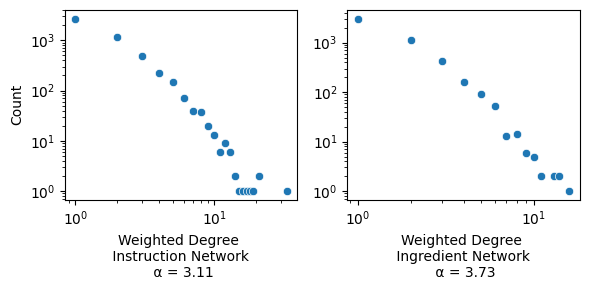

In [76]:

# Figure: compare subnetworks
fig, ax = plt.subplots(1,2, figsize = (6,3))

# right plot formatting

ax[0].set_xlabel(f"Weighted Degree \n Instruction Network \n α = {inst_alpha:.2f}")
ax[0].set_ylabel("Count")
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# right plot formatting
ax[1].set_xlabel(f"Weighted Degree \n Ingredient Network \n α = {ingr_alpha:.2f}")
ax[1].set_yscale('log')
ax[1].set_xscale('log')


# a_counts = count_degrees(instruction_centralities['Weighted Degree'])
a = sns.scatterplot(x=a_counts[0],y=a_counts[1],ax=ax[0])

# b_counts = count_degrees(ingredient_centralities['Weighted Degree'])
b = sns.scatterplot(x=b_counts[0],y=b_counts[1],ax=ax[1])

fig.tight_layout()

plt.savefig('figs/potential_powerlaw.pdf')

In [83]:
ingredient_centralities2 = pd.read_csv("ingredient_centralities_notranked.csv")

ingr_rounded_degree2 = [round(x) for x in ingredient_centralities2['Weighted Degree']]

ingr_rounded_degree2 = [x for x in ingr_rounded_degree2 if x > 0]

c_counts = count_degrees(ingr_rounded_degree2)

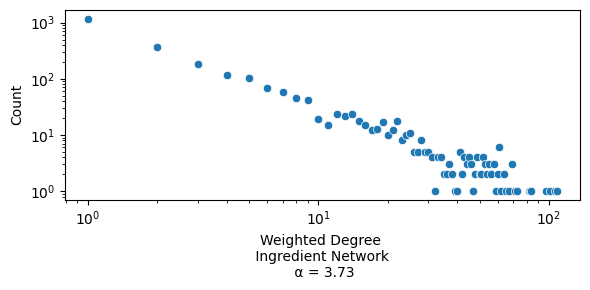

In [84]:
fig, ax = plt.subplots(1,1, figsize = (6,3))
ingr_powerlaw = powerlaw.Fit(ingr_rounded_degree, xmin =1 )
# right plot formatting

ax.set_xlabel(f"Weighted Degree \n Ingredient Network \n α = {ingr_powerlaw.alpha:.2f}")
ax.set_ylabel("Count")
ax.set_yscale('log')
ax.set_xscale('log')

c = sns.scatterplot(x=c_counts[0],y=c_counts[1],ax=ax)

fig.tight_layout()
